In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import scipy

In [2]:
l1 = np.random.normal(size=50000)
l2 = np.random.normal(size=50000)

latents = np.array([l1, l1*0.5, l1*0.25, l2*0.5]).T
X = latents + np.random.normal(size=4 * 50000).reshape((50000, 4))*0.5
Y = latents + np.random.normal(size=4 * 50000).reshape((50000, 4))*0.5

X = X-X.mean(axis=0)
Y = Y-Y.mean(axis=0)

In [3]:
cca = CCA(n_components=1)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)
cca_corr = np.corrcoef(X_c.T,Y_c.T)[1,0]

In [4]:
c12 = X.T@Y
c11 = X.T@X
c22 = Y.T@Y

c11_inv_sqrt = scipy.linalg.inv(scipy.linalg.sqrtm(c11))
c22_inv_sqrt = scipy.linalg.inv(scipy.linalg.sqrtm(c22))

R = c11_inv_sqrt@c12@c22_inv_sqrt
eigenvalue,eigenvector = np.linalg.eig(R.T@R)

eigenvalue = abs(eigenvalue)
m = max(eigenvalue)
ind = list(eigenvalue).index(m)

a_t = c11_inv_sqrt@eigenvector[:,ind]
a_t = a_t.reshape((len(a_t),1))/np.linalg.norm(a_t)
b_t = c22_inv_sqrt@eigenvector[:,ind]
b_t = b_t.reshape((len(b_t),1))/np.linalg.norm(b_t)

X_t = X@a_t
Y_t = Y@b_t

my_cca_corr = np.corrcoef(X_t.T,Y_t.T)[1,0]

In [5]:
V = np.random.randn(8,1)
V,_ = np.linalg.qr(V, mode='reduced')
print(V[:4])
U = np.random.randn(8,1)
U,_ = np.linalg.qr(U, mode='reduced')

beta = 0.000005
alpha = 0.000005
corr_list = []
c11_inv_sqrt = np.zeros((4,4))
c22_inv_sqrt = np.zeros((4,4))

for j in range(99):
    for i in range(500):
        
        ind = j*500+i
        x = X[ind:ind+4,:]
        y = Y[ind:ind+4,:]
        
        c12 = x.T@y
        c11 = x.T@x
        c22 = y.T@y

        A = np.zeros((8,8))
        A[:4,4:] = c12
        A[4:,:4] = c12.T
        
        B = np.zeros((8,8))
        B[0:4,0:4] = c11
        B[4:8,4:8] = c22
        
        U -= alpha*B@U
        V += beta*A@U

        V[:4] = V[:4]/np.sqrt(V[:4].T@X[:ind+1,:].T@X[:ind+1,:]@V[:4])
        V[4:] = V[4:]/np.sqrt(V[4:].T@Y[:ind+1,:].T@Y[:ind+1,:]@V[4:])
    
    a = V[:4]
    b = V[4:]
    X_s = X@a
    Y_s = Y@b
    
    corr_list.append(np.corrcoef(X_s.T,Y_s.T)[1,0])

[[-0.14893857]
 [ 0.05250311]
 [ 0.65621388]
 [ 0.22832375]]


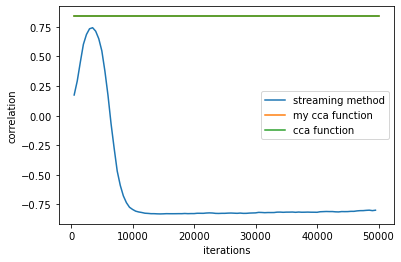

In [6]:
plt.plot(np.array(list(range(1,100)))*500,corr_list,label='streaming method')
plt.plot([500,50000],[my_cca_corr,my_cca_corr],label='my cca function')
plt.plot([500,50000],[cca_corr,cca_corr],label='cca function')
plt.xlabel('iterations')
plt.ylabel('correlation')
plt.legend()
plt.show()

In [7]:
c12 = X.T@Y
c11 = X.T@X
c22 = Y.T@Y

A = np.zeros((8,8))
A[:4,4:] = c12
A[4:,:4] = c12.T

B = np.zeros((8,8))
B[0:4,0:4] = c11
B[4:8,4:8] = c22

eigenvalue,eigenvector = np.linalg.eig(A)
print(eigenvalue)
eigenvalue,eigenvector = np.linalg.eig(B)
print(eigenvalue)

[-6.52860228e+04  6.52860228e+04 -1.25095813e+04  1.25095813e+04
 -8.77866849e+01 -5.48646532e+01  5.48646532e+01  8.77866849e+01]
[77569.70101943 12466.18647557 12611.8612747  24981.87434706
 77932.71367927 12678.17700056 12363.79423589 25149.5882429 ]


In [8]:
a/np.linalg.norm(a)

array([[ 0.77949606],
       [ 0.37315893],
       [ 0.1602261 ],
       [-0.47693387]])

In [9]:
cca.x_weights_

array([[ 0.94479348],
       [ 0.30591809],
       [ 0.11737715],
       [-0.00141428]])

Av = \lambda Bv
A = 